<h1>Sustainable Energy Transitions</h1>
<div>A project by <a href="http://www.ssgouridis.org" target="_blank" >Sgouris Sgouridis</a> and <a href="http://www.csaladen.es" target="_blank" >Dénes Csala</a> at <a  href="http://www.masdar.ac.ae" target="_blank">Masdar Institute of Science and Technology</a></div>
<h2><br>Plotting notebook for social media images 2</h2>

This workbook will guide you through the mining, processing, formatting and saving the input data for the <a target="_blank" href="http://set.csaladen.es/set2.html">SET 2.0</a> model.

<p>This is document has been created using  <a target="_blank" href="http://ipython.org/">IPython Notebook</a> in the <a target="_blank" href="https://store.continuum.io/cshop/anaconda/">Anaconda</a> distribution and it can be edited and run in <i>active</i> mode by clicking download in top right corner of this page. The code is partitioned into sections, called <i>cells</i>. When you are using this workbook in <i>active</i> mode, double-click on a cell to edit it and then run using <code>Ctrl + Enter</code>. Hitting <code>Shift + Enter</code> runs the code and steps into the next cell, while <code>Alt + Enter</code> runs the code and adds a new, empty cell. If you are running this notebook on a presonal computer, you will need a machine with at least <i>1GB</i> of memory (<i>2GB</i> recommended) and a processor of <i>1GHz</i>.
<h2>Data</h2>
<p>The major data sources for this work are the <a href="http://set.csaladen.es/data/results/index.html" target="_blank">outputs</a> generated by the SET 2.0 model.
</p>
<h2>Processing</h2>
<p>The data processing has been done using the <a target="_blank" href="https://store.continuum.io/cshop/anaconda/">Anaconda</a> distribution of <a target="_blank" href="https://www.python.org/">Python 2.7</a> using the <i>IPython Notebook</i> editor. If you have not generated your own data, please download <a href="http://set.csaladen.es/data/results/index.html" target="_blank">all</a> results files, and run this <i>Iptyhon</i> notebook in the same folder. Then the data is loaded into a <a target="_blank" href="http://pandas.pydata.org/">pandas</a> dataframe, which represents the backbone of the data analysis. Numerical processing is done with <a target="_blank" href="http://www.numpy.org/">NumPy</a> and for plotting we use <a target="_blank" href="http://matplotlib.org/">matplotlib</a>. Please make sure you have all of these compoents set up in your <i>Python</i> installation. The workbook generates <i>.jpg</i> files to be inlcuded on the <a target="_blank" href="http://set.csaladen.es/">main</a> data presentation site.
</p>

<h1>Code</h1>

Import dependencies.

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as font_manager
%matplotlib inline

In [2]:
mycolors=['#dd1c77','#df65b0','#980043']
abc='abcdefghijklmnopqrstuvwxyz' #for plot labeling

In [3]:
#for plot styling - not necessary
plt.style.use('fivethirtyeight')
#plt.style.use('classic')

Set up save path on your local computer.

In [4]:
path="E:\Skydrive\GitHub\set"

In [5]:
titless=[['Fossil phase-out: 2015 - 2050',\
        'Fossil phase-out: 2015 - 2080',\
        'Fossil phase-out: 2020 - 2040'],\
        ['Fossil phase-out: 2020 - 2075',\
        'Fossil phase-out: 2020 - 2100',\
        'Fossil phase-out: 2030 - 2060'],\
        ['Fossil phase-out: 2025 - 2100',\
        'Fossil phase-out: 2025 - 2130',\
        'Fossil phase-out: 2040 - 2080']]
peaks=[[2015,\
        2015,\
        2020],\
        [2020,\
         2020,\
         2030],\
        [2025,\
         2025,\
         2040]]
caps=[r"Emissions cap: 510 GtCO$_2$",r"Emissions cap: 990 GtCO$_2$",r"Emissions cap: 1505 GtCO$_2$"]
trans=["Early","Fuel switch","Late"]

# Sensitivity

In [6]:
#plots setup

demand=10 #demand bracket
eroei=9 #eroei bracket
D=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['final demand'].values[demand*21]))
E=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['wind EROEI'].values[eroei]))

colors='Spectral_r'
bases=[7,10,13]
shares=["6.1","3.2","10.1"]

order=[3,5,4,0,2,1,6,8,7]

lifetime=25
moving_window=10

# Read data

In [7]:
DF={}
DF2={}
DF3={}
DF4={}
for k in range(len(order)):
    i=order[k]+7
    DF[k]=pd.read_excel('data/results/results'+repr(i)+'.xlsx',sheetname=1,header=None)
    DF2[k]=pd.read_excel('data/results/results'+repr(i)+'.xlsx',sheetname=2,header=None)
    DF3[k]=pd.read_excel('data/results/results'+repr(i)+'.xlsx',sheetname=0,header=None)
    DF4[k]=pd.read_excel('data/results/results'+repr(i)+'.xlsx',sheetname=3,header=None)

#Demand plots

Demand Rates

In [8]:
fpath = 'Comfortaa.ttf'
prop = font_manager.FontProperties(fname=fpath)

C:\Anaconda\envs\py27\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=True).mean()


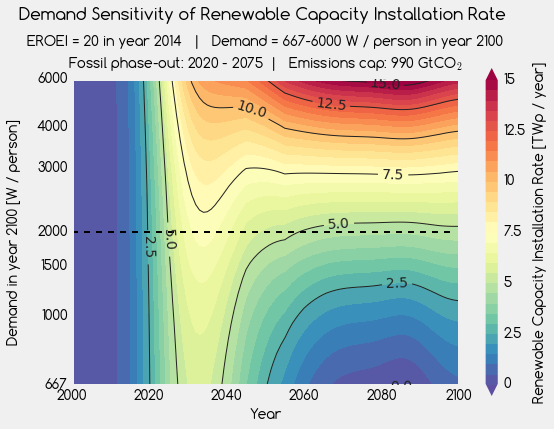

In [34]:
eroei=9 #eroei bracket 2000
E=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['wind EROEI'].values[eroei]))

vi=0
vx=15.0
vx2=35.0
lev=vx/2.5+1
lev2=(vx2-vx)/2.5+1
fig = plt.figure(figsize=(7,5))                                                               
ax=[]
ax.append(plt.subplot2grid((2,2), (0,0), rowspan=2, colspan=2, axisbg=None, axisbelow=True))
fig.tight_layout()  
fig.subplots_adjust(wspace=0.35)

for k in [3]:#+range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7

    df=DF[k].copy()
    df=df[df.columns[eroei::21]]
    df.index=range(1950,2111)
    df2=DF2[k].copy()
    df2.index=range(1950,2111)
    df2=df2[df2.columns[eroei::21]]
    df+=df2/lifetime
    df=pd.rolling_mean(df,moving_window,center=True) 
    df=df.loc[2001:2101]

    a2=ax[0].contourf(df.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-100,vmax=vx2)
    a=ax[0].contourf(df.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,extend='both')
    b=ax[0].contour(df.T,linewidths=1,levels=np.linspace(vi,vx*2,(lev-1)*2+1).astype(float),colors='#222222')
    ax[0].set_ylim(1,21)
    ax[0].set_xlim(0,100)
    ax[0].clabel(b, fmt = '%r',inline=1, fontsize=14,fontproperties=prop)
    ax[0].set_xticklabels([2000,2020,2040,2060,2080,2100],size=14,fontproperties=prop)
    ticks=np.array([0,4.5,7.8,10,14.2,16.9,20])+1
    ax[0].set_yticks(ticks)
    tick1=[667,1000,1500,2000,3000,4000,6000]
    ax[0].set_yticklabels(tick1,size=14,fontproperties=prop)
    ax[0].set_xlabel('Year',fontproperties=prop)
    ax[0].set_ylabel('Demand in year 2100 [W / person]',labelpad=15,fontproperties=prop)
    ax[0].text(0.5, 1.02, title+r"  |   "+cap,
        horizontalalignment='center',
        verticalalignment='bottom',fontproperties=prop,
        transform=ax[0].transAxes,size=14,color='k')
    ax[0].text(0.5, 1.1, r"EROEI = "+repr(E)+" in year 2014   |   Demand = 667-6000 W / person in year 2100",
        horizontalalignment='center',
        verticalalignment='bottom',fontproperties=prop,
        transform=ax[0].transAxes,size=14,color='k')

    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.05, 0.03, 0.930])
    fig.colorbar(a, cmap=colors, cax=cbar_ax, ticks=[0,2.5,5.0,7.5,10.0,12.5,15.0])
    cbar_ax.set_yticklabels([0,2.5,5,7.5,10,12.5,15],fontproperties=prop)

    ax[0].text(1.21, 0.5, 'Renewable Capacity Installation Rate [TWp / year]',
    horizontalalignment='center',
    verticalalignment='center',rotation=90,
    transform=ax[0].transAxes,fontproperties=prop)

ax[0].plot([11 for i in range(1,101)],linewidth=2,color='k',linestyle='--')
plt.suptitle('Demand Sensitivity of Renewable Capacity Installation Rate',fontproperties=prop,size=17,y=1.14,x=0.46)    
plt.savefig(path+'/twitter/z3.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
#plt.close()

C:\Anaconda\envs\py27\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=True).mean()


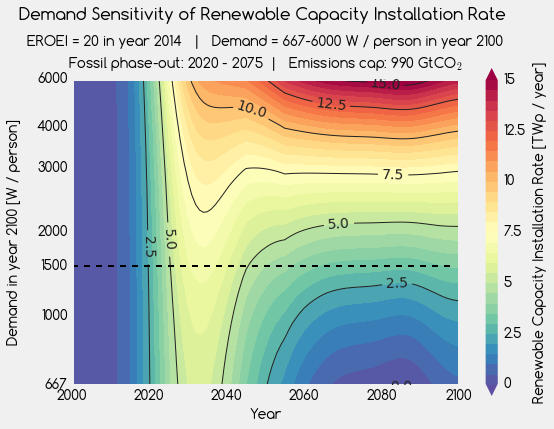

In [13]:
eroei=9 #eroei bracket 2000
E=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['wind EROEI'].values[eroei]))

vi=0
vx=15.0
vx2=35.0
lev=vx/2.5+1
lev2=(vx2-vx)/2.5+1
fig = plt.figure(figsize=(7,5))                                                               
ax=[]
ax.append(plt.subplot2grid((2,2), (0,0), rowspan=2, colspan=2, axisbg=None, axisbelow=True))
fig.tight_layout()  
fig.subplots_adjust(wspace=0.35)

for k in [3]:#+range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7

    df=DF[k].copy()
    df=df[df.columns[eroei::21]]
    df.index=range(1950,2111)
    df2=DF2[k].copy()
    df2.index=range(1950,2111)
    df2=df2[df2.columns[eroei::21]]
    df+=df2/lifetime
    df=pd.rolling_mean(df,moving_window,center=True) 
    df=df.loc[2001:2101]

    a2=ax[0].contourf(df.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-100,vmax=vx2)
    a=ax[0].contourf(df.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,extend='both')
    b=ax[0].contour(df.T,linewidths=1,levels=np.linspace(vi,vx*2,(lev-1)*2+1).astype(float),colors='#222222')
    ax[0].set_ylim(1,21)
    ax[0].set_xlim(0,100)
    ax[0].clabel(b, fmt = '%r',inline=1, fontsize=14,fontproperties=prop)
    ax[0].set_xticklabels([2000,2020,2040,2060,2080,2100],size=14,fontproperties=prop)
    ticks=np.array([0,4.5,7.8,10,14.2,16.9,20])+1
    ax[0].set_yticks(ticks)
    tick1=[667,1000,1500,2000,3000,4000,6000]
    ax[0].set_yticklabels(tick1,size=14,fontproperties=prop)
    ax[0].set_xlabel('Year',fontproperties=prop)
    ax[0].set_ylabel('Demand in year 2100 [W / person]',labelpad=15,fontproperties=prop)
    ax[0].text(0.5, 1.02, title+r"  |   "+cap,
        horizontalalignment='center',
        verticalalignment='bottom',fontproperties=prop,
        transform=ax[0].transAxes,size=14,color='k')
    ax[0].text(0.5, 1.1, r"EROEI = "+repr(E)+" in year 2014   |   Demand = 667-6000 W / person in year 2100",
        horizontalalignment='center',
        verticalalignment='bottom',fontproperties=prop,
        transform=ax[0].transAxes,size=14,color='k')

    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.05, 0.03, 0.930])
    fig.colorbar(a, cmap=colors, cax=cbar_ax, ticks=[0,2.5,5.0,7.5,10.0,12.5,15.0])
    cbar_ax.set_yticklabels([0,2.5,5,7.5,10,12.5,15],fontproperties=prop)

    ax[0].text(1.21, 0.5, 'Renewable Capacity Installation Rate [TWp / year]',
    horizontalalignment='center',
    verticalalignment='center',rotation=90,
    transform=ax[0].transAxes,fontproperties=prop)

ax[0].plot([8.8 for i in range(1,101)],linewidth=2,color='k',linestyle='--')
plt.suptitle('Demand Sensitivity of Renewable Capacity Installation Rate',fontproperties=prop,size=17,y=1.14,x=0.46)    
plt.savefig(path+'/twitter/z2.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
#plt.close()

C:\Anaconda\envs\py27\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=True).mean()


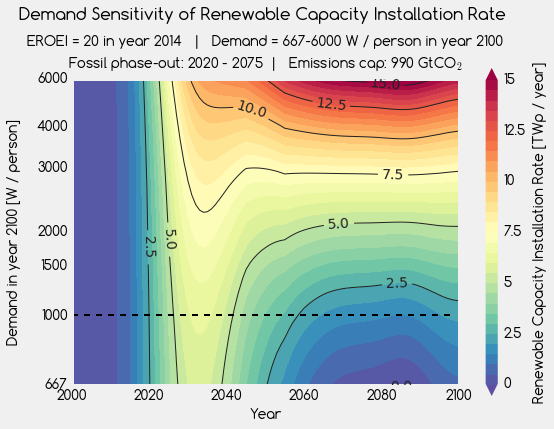

In [20]:
eroei=9 #eroei bracket 2000
E=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['wind EROEI'].values[eroei]))

vi=0
vx=15.0
vx2=35.0
lev=vx/2.5+1
lev2=(vx2-vx)/2.5+1
fig = plt.figure(figsize=(7,5))                                                               
ax=[]
ax.append(plt.subplot2grid((2,2), (0,0), rowspan=2, colspan=2, axisbg=None, axisbelow=True))
fig.tight_layout()  
fig.subplots_adjust(wspace=0.35)

for k in [3]:#+range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7

    df=DF[k].copy()
    df=df[df.columns[eroei::21]]
    df.index=range(1950,2111)
    df2=DF2[k].copy()
    df2.index=range(1950,2111)
    df2=df2[df2.columns[eroei::21]]
    df+=df2/lifetime
    df=pd.rolling_mean(df,moving_window,center=True) 
    df=df.loc[2001:2101]

    a2=ax[0].contourf(df.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-100,vmax=vx2)
    a=ax[0].contourf(df.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,extend='both')
    b=ax[0].contour(df.T,linewidths=1,levels=np.linspace(vi,vx*2,(lev-1)*2+1).astype(float),colors='#222222')
    ax[0].set_ylim(1,21)
    ax[0].set_xlim(0,100)
    ax[0].clabel(b, fmt = '%r',inline=1, fontsize=14,fontproperties=prop)
    ax[0].set_xticklabels([2000,2020,2040,2060,2080,2100],size=14,fontproperties=prop)
    ticks=np.array([0,4.5,7.8,10,14.2,16.9,20])+1
    ax[0].set_yticks(ticks)
    tick1=[667,1000,1500,2000,3000,4000,6000]
    ax[0].set_yticklabels(tick1,size=14,fontproperties=prop)
    ax[0].set_xlabel('Year',fontproperties=prop)
    ax[0].set_ylabel('Demand in year 2100 [W / person]',labelpad=15,fontproperties=prop)
    ax[0].text(0.5, 1.02, title+r"  |   "+cap,
        horizontalalignment='center',
        verticalalignment='bottom',fontproperties=prop,
        transform=ax[0].transAxes,size=14,color='k')
    ax[0].text(0.5, 1.1, r"EROEI = "+repr(E)+" in year 2014   |   Demand = 667-6000 W / person in year 2100",
        horizontalalignment='center',
        verticalalignment='bottom',fontproperties=prop,
        transform=ax[0].transAxes,size=14,color='k')

    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.05, 0.03, 0.930])
    fig.colorbar(a, cmap=colors, cax=cbar_ax, ticks=[0,2.5,5.0,7.5,10.0,12.5,15.0])
    cbar_ax.set_yticklabels([0,2.5,5,7.5,10,12.5,15],fontproperties=prop)

    ax[0].text(1.21, 0.5, 'Renewable Capacity Installation Rate [TWp / year]',
    horizontalalignment='center',
    verticalalignment='center',rotation=90,
    transform=ax[0].transAxes,fontproperties=prop)

ax[0].plot([5.6 for i in range(1,101)],linewidth=2,color='k',linestyle='--')
plt.suptitle('Demand Sensitivity of Renewable Capacity Installation Rate',fontproperties=prop,size=17,y=1.14,x=0.46)    
plt.savefig(path+'/twitter/z1.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
#plt.close()

C:\Anaconda\envs\py27\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=True).mean()


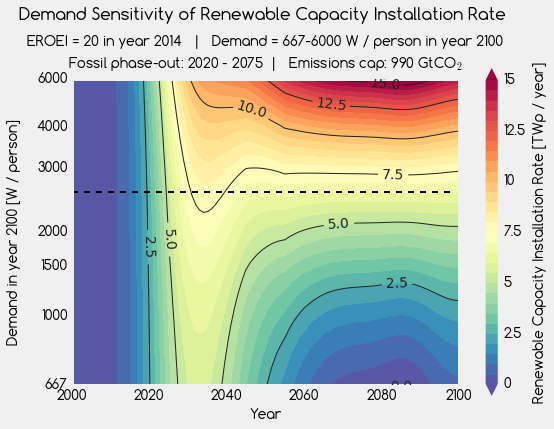

In [21]:
eroei=9 #eroei bracket 2000
E=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['wind EROEI'].values[eroei]))

vi=0
vx=15.0
vx2=35.0
lev=vx/2.5+1
lev2=(vx2-vx)/2.5+1
fig = plt.figure(figsize=(7,5))                                                               
ax=[]
ax.append(plt.subplot2grid((2,2), (0,0), rowspan=2, colspan=2, axisbg=None, axisbelow=True))
fig.tight_layout()  
fig.subplots_adjust(wspace=0.35)

for k in [3]:#+range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7

    df=DF[k].copy()
    df=df[df.columns[eroei::21]]
    df.index=range(1950,2111)
    df2=DF2[k].copy()
    df2.index=range(1950,2111)
    df2=df2[df2.columns[eroei::21]]
    df+=df2/lifetime
    df=pd.rolling_mean(df,moving_window,center=True) 
    df=df.loc[2001:2101]

    a2=ax[0].contourf(df.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-100,vmax=vx2)
    a=ax[0].contourf(df.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,extend='both')
    b=ax[0].contour(df.T,linewidths=1,levels=np.linspace(vi,vx*2,(lev-1)*2+1).astype(float),colors='#222222')
    ax[0].set_ylim(1,21)
    ax[0].set_xlim(0,100)
    ax[0].clabel(b, fmt = '%r',inline=1, fontsize=14,fontproperties=prop)
    ax[0].set_xticklabels([2000,2020,2040,2060,2080,2100],size=14,fontproperties=prop)
    ticks=np.array([0,4.5,7.8,10,14.2,16.9,20])+1
    ax[0].set_yticks(ticks)
    tick1=[667,1000,1500,2000,3000,4000,6000]
    ax[0].set_yticklabels(tick1,size=14,fontproperties=prop)
    ax[0].set_xlabel('Year',fontproperties=prop)
    ax[0].set_ylabel('Demand in year 2100 [W / person]',labelpad=15,fontproperties=prop)
    ax[0].text(0.5, 1.02, title+r"  |   "+cap,
        horizontalalignment='center',
        verticalalignment='bottom',fontproperties=prop,
        transform=ax[0].transAxes,size=14,color='k')
    ax[0].text(0.5, 1.1, r"EROEI = "+repr(E)+" in year 2014   |   Demand = 667-6000 W / person in year 2100",
        horizontalalignment='center',
        verticalalignment='bottom',fontproperties=prop,
        transform=ax[0].transAxes,size=14,color='k')

    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.05, 0.03, 0.930])
    fig.colorbar(a, cmap=colors, cax=cbar_ax, ticks=[0,2.5,5.0,7.5,10.0,12.5,15.0])
    cbar_ax.set_yticklabels([0,2.5,5,7.5,10,12.5,15],fontproperties=prop)

    ax[0].text(1.21, 0.5, 'Renewable Capacity Installation Rate [TWp / year]',
    horizontalalignment='center',
    verticalalignment='center',rotation=90,
    transform=ax[0].transAxes,fontproperties=prop)

ax[0].plot([13.6 for i in range(1,101)],linewidth=2,color='k',linestyle='--')
plt.suptitle('Demand Sensitivity of Renewable Capacity Installation Rate',fontproperties=prop,size=17,y=1.14,x=0.46)    
plt.savefig(path+'/twitter/z4.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
#plt.close()

C:\Anaconda\envs\py27\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=True).mean()


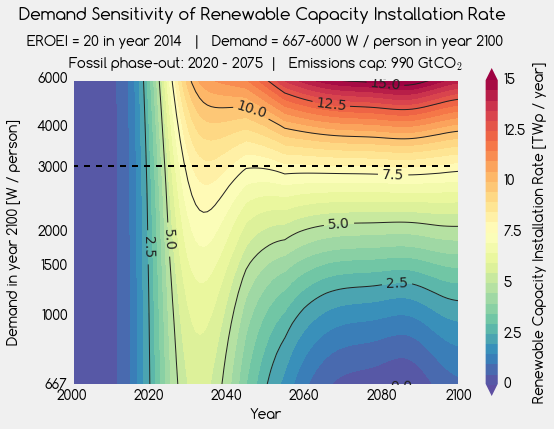

In [25]:
eroei=9 #eroei bracket 2000
E=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['wind EROEI'].values[eroei]))

vi=0
vx=15.0
vx2=35.0
lev=vx/2.5+1
lev2=(vx2-vx)/2.5+1
fig = plt.figure(figsize=(7,5))                                                               
ax=[]
ax.append(plt.subplot2grid((2,2), (0,0), rowspan=2, colspan=2, axisbg=None, axisbelow=True))
fig.tight_layout()  
fig.subplots_adjust(wspace=0.35)

for k in [3]:#+range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7

    df=DF[k].copy()
    df=df[df.columns[eroei::21]]
    df.index=range(1950,2111)
    df2=DF2[k].copy()
    df2.index=range(1950,2111)
    df2=df2[df2.columns[eroei::21]]
    df+=df2/lifetime
    df=pd.rolling_mean(df,moving_window,center=True) 
    df=df.loc[2001:2101]

    a2=ax[0].contourf(df.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-100,vmax=vx2)
    a=ax[0].contourf(df.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,extend='both')
    b=ax[0].contour(df.T,linewidths=1,levels=np.linspace(vi,vx*2,(lev-1)*2+1).astype(float),colors='#222222')
    ax[0].set_ylim(1,21)
    ax[0].set_xlim(0,100)
    ax[0].clabel(b, fmt = '%r',inline=1, fontsize=14,fontproperties=prop)
    ax[0].set_xticklabels([2000,2020,2040,2060,2080,2100],size=14,fontproperties=prop)
    ticks=np.array([0,4.5,7.8,10,14.2,16.9,20])+1
    ax[0].set_yticks(ticks)
    tick1=[667,1000,1500,2000,3000,4000,6000]
    ax[0].set_yticklabels(tick1,size=14,fontproperties=prop)
    ax[0].set_xlabel('Year',fontproperties=prop)
    ax[0].set_ylabel('Demand in year 2100 [W / person]',labelpad=15,fontproperties=prop)
    ax[0].text(0.5, 1.02, title+r"  |   "+cap,
        horizontalalignment='center',
        verticalalignment='bottom',fontproperties=prop,
        transform=ax[0].transAxes,size=14,color='k')
    ax[0].text(0.5, 1.1, r"EROEI = "+repr(E)+" in year 2014   |   Demand = 667-6000 W / person in year 2100",
        horizontalalignment='center',
        verticalalignment='bottom',fontproperties=prop,
        transform=ax[0].transAxes,size=14,color='k')

    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.05, 0.03, 0.930])
    fig.colorbar(a, cmap=colors, cax=cbar_ax, ticks=[0,2.5,5.0,7.5,10.0,12.5,15.0])
    cbar_ax.set_yticklabels([0,2.5,5,7.5,10,12.5,15],fontproperties=prop)

    ax[0].text(1.21, 0.5, 'Renewable Capacity Installation Rate [TWp / year]',
    horizontalalignment='center',
    verticalalignment='center',rotation=90,
    transform=ax[0].transAxes,fontproperties=prop)

ax[0].plot([15.3 for i in range(1,101)],linewidth=2,color='k',linestyle='--')
plt.suptitle('Demand Sensitivity of Renewable Capacity Installation Rate',fontproperties=prop,size=17,y=1.14,x=0.46)    
plt.savefig(path+'/twitter/z5.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
#plt.close()

C:\Anaconda\envs\py27\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=True).mean()


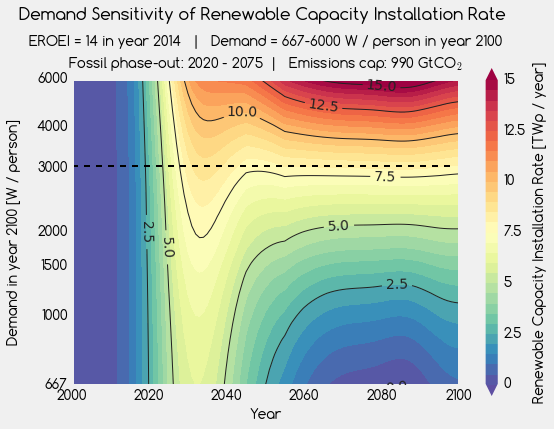

In [29]:
eroei=6 #eroei bracket 2000
E=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['wind EROEI'].values[eroei]))

vi=0
vx=15.0
vx2=35.0
lev=vx/2.5+1
lev2=(vx2-vx)/2.5+1
fig = plt.figure(figsize=(7,5))                                                               
ax=[]
ax.append(plt.subplot2grid((2,2), (0,0), rowspan=2, colspan=2, axisbg=None, axisbelow=True))
fig.tight_layout()  
fig.subplots_adjust(wspace=0.35)

for k in [3]:#+range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7

    df=DF[k].copy()
    df=df[df.columns[eroei::21]]
    df.index=range(1950,2111)
    df2=DF2[k].copy()
    df2.index=range(1950,2111)
    df2=df2[df2.columns[eroei::21]]
    df+=df2/lifetime
    df=pd.rolling_mean(df,moving_window,center=True) 
    df=df.loc[2001:2101]

    a2=ax[0].contourf(df.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-100,vmax=vx2)
    a=ax[0].contourf(df.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,extend='both')
    b=ax[0].contour(df.T,linewidths=1,levels=np.linspace(vi,vx*2,(lev-1)*2+1).astype(float),colors='#222222')
    ax[0].set_ylim(1,21)
    ax[0].set_xlim(0,100)
    ax[0].clabel(b, fmt = '%r',inline=1, fontsize=14,fontproperties=prop)
    ax[0].set_xticklabels([2000,2020,2040,2060,2080,2100],size=14,fontproperties=prop)
    ticks=np.array([0,4.5,7.8,10,14.2,16.9,20])+1
    ax[0].set_yticks(ticks)
    tick1=[667,1000,1500,2000,3000,4000,6000]
    ax[0].set_yticklabels(tick1,size=14,fontproperties=prop)
    ax[0].set_xlabel('Year',fontproperties=prop)
    ax[0].set_ylabel('Demand in year 2100 [W / person]',labelpad=15,fontproperties=prop)
    ax[0].text(0.5, 1.02, title+r"  |   "+cap,
        horizontalalignment='center',
        verticalalignment='bottom',fontproperties=prop,
        transform=ax[0].transAxes,size=14,color='k')
    ax[0].text(0.5, 1.1, r"EROEI = "+repr(E)+" in year 2014   |   Demand = 667-6000 W / person in year 2100",
        horizontalalignment='center',
        verticalalignment='bottom',fontproperties=prop,
        transform=ax[0].transAxes,size=14,color='k')

    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.05, 0.03, 0.930])
    fig.colorbar(a, cmap=colors, cax=cbar_ax, ticks=[0,2.5,5.0,7.5,10.0,12.5,15.0])
    cbar_ax.set_yticklabels([0,2.5,5,7.5,10,12.5,15],fontproperties=prop)

    ax[0].text(1.21, 0.5, 'Renewable Capacity Installation Rate [TWp / year]',
    horizontalalignment='center',
    verticalalignment='center',rotation=90,
    transform=ax[0].transAxes,fontproperties=prop)

ax[0].plot([15.3 for i in range(1,101)],linewidth=2,color='k',linestyle='--')
plt.suptitle('Demand Sensitivity of Renewable Capacity Installation Rate',fontproperties=prop,size=17,y=1.14,x=0.46)    
plt.savefig(path+'/twitter/z6.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
#plt.close()

C:\Anaconda\envs\py27\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=True).mean()


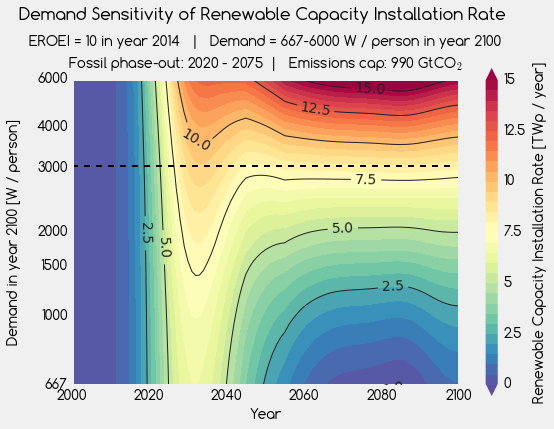

In [27]:
eroei=3 #eroei bracket 2000
E=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['wind EROEI'].values[eroei]))

vi=0
vx=15.0
vx2=35.0
lev=vx/2.5+1
lev2=(vx2-vx)/2.5+1
fig = plt.figure(figsize=(7,5))                                                               
ax=[]
ax.append(plt.subplot2grid((2,2), (0,0), rowspan=2, colspan=2, axisbg=None, axisbelow=True))
fig.tight_layout()  
fig.subplots_adjust(wspace=0.35)

for k in [3]:#+range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7

    df=DF[k].copy()
    df=df[df.columns[eroei::21]]
    df.index=range(1950,2111)
    df2=DF2[k].copy()
    df2.index=range(1950,2111)
    df2=df2[df2.columns[eroei::21]]
    df+=df2/lifetime
    df=pd.rolling_mean(df,moving_window,center=True) 
    df=df.loc[2001:2101]

    a2=ax[0].contourf(df.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-100,vmax=vx2)
    a=ax[0].contourf(df.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,extend='both')
    b=ax[0].contour(df.T,linewidths=1,levels=np.linspace(vi,vx*2,(lev-1)*2+1).astype(float),colors='#222222')
    ax[0].set_ylim(1,21)
    ax[0].set_xlim(0,100)
    ax[0].clabel(b, fmt = '%r',inline=1, fontsize=14,fontproperties=prop)
    ax[0].set_xticklabels([2000,2020,2040,2060,2080,2100],size=14,fontproperties=prop)
    ticks=np.array([0,4.5,7.8,10,14.2,16.9,20])+1
    ax[0].set_yticks(ticks)
    tick1=[667,1000,1500,2000,3000,4000,6000]
    ax[0].set_yticklabels(tick1,size=14,fontproperties=prop)
    ax[0].set_xlabel('Year',fontproperties=prop)
    ax[0].set_ylabel('Demand in year 2100 [W / person]',labelpad=15,fontproperties=prop)
    ax[0].text(0.5, 1.02, title+r"  |   "+cap,
        horizontalalignment='center',
        verticalalignment='bottom',fontproperties=prop,
        transform=ax[0].transAxes,size=14,color='k')
    ax[0].text(0.5, 1.1, r"EROEI = "+repr(E)+" in year 2014   |   Demand = 667-6000 W / person in year 2100",
        horizontalalignment='center',
        verticalalignment='bottom',fontproperties=prop,
        transform=ax[0].transAxes,size=14,color='k')

    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.05, 0.03, 0.930])
    fig.colorbar(a, cmap=colors, cax=cbar_ax, ticks=[0,2.5,5.0,7.5,10.0,12.5,15.0])
    cbar_ax.set_yticklabels([0,2.5,5,7.5,10,12.5,15],fontproperties=prop)

    ax[0].text(1.21, 0.5, 'Renewable Capacity Installation Rate [TWp / year]',
    horizontalalignment='center',
    verticalalignment='center',rotation=90,
    transform=ax[0].transAxes,fontproperties=prop)

ax[0].plot([15.3 for i in range(1,101)],linewidth=2,color='k',linestyle='--')
plt.suptitle('Demand Sensitivity of Renewable Capacity Installation Rate',fontproperties=prop,size=17,y=1.14,x=0.46)    
plt.savefig(path+'/twitter/z7.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
#plt.close()

C:\Anaconda\envs\py27\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=True).mean()


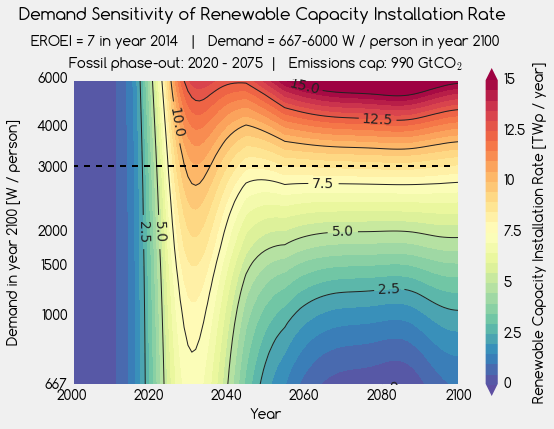

In [32]:
eroei=0 #eroei bracket 2000
E=(int)(np.round(pd.read_excel('data/parameters/params7.xlsx').set_index('Run').loc['wind EROEI'].values[eroei]))

vi=0
vx=15.0
vx2=35.0
lev=vx/2.5+1
lev2=(vx2-vx)/2.5+1
fig = plt.figure(figsize=(7,5))                                                               
ax=[]
ax.append(plt.subplot2grid((2,2), (0,0), rowspan=2, colspan=2, axisbg=None, axisbelow=True))
fig.tight_layout()  
fig.subplots_adjust(wspace=0.35)

for k in [3]:#+range(len(order)):
    title=titless[k/3][k%3]
    base=bases[k/3]
    cap=caps[k/3]
    tran=trans[k%3]
    share=shares[k/3]
    i=order[k]+7

    df=DF[k].copy()
    df=df[df.columns[eroei::21]]
    df.index=range(1950,2111)
    df2=DF2[k].copy()
    df2.index=range(1950,2111)
    df2=df2[df2.columns[eroei::21]]
    df+=df2/lifetime
    df=pd.rolling_mean(df,moving_window,center=True) 
    df=df.loc[2001:2101]

    a2=ax[0].contourf(df.T,levels=np.linspace(vx,vx2,lev2),cmap=colors,extend='max',vmin=-100,vmax=vx2)
    a=ax[0].contourf(df.T,levels=np.linspace(vi,vx,(lev-1)*5+1),cmap=colors,extend='both')
    b=ax[0].contour(df.T,linewidths=1,levels=np.linspace(vi,vx*2,(lev-1)*2+1).astype(float),colors='#222222')
    ax[0].set_ylim(1,21)
    ax[0].set_xlim(0,100)
    ax[0].clabel(b, fmt = '%r',inline=1, fontsize=14,fontproperties=prop)
    ax[0].set_xticklabels([2000,2020,2040,2060,2080,2100],size=14,fontproperties=prop)
    ticks=np.array([0,4.5,7.8,10,14.2,16.9,20])+1
    ax[0].set_yticks(ticks)
    tick1=[667,1000,1500,2000,3000,4000,6000]
    ax[0].set_yticklabels(tick1,size=14,fontproperties=prop)
    ax[0].set_xlabel('Year',fontproperties=prop)
    ax[0].set_ylabel('Demand in year 2100 [W / person]',labelpad=15,fontproperties=prop)
    ax[0].text(0.5, 1.02, title+r"  |   "+cap,
        horizontalalignment='center',
        verticalalignment='bottom',fontproperties=prop,
        transform=ax[0].transAxes,size=14,color='k')
    ax[0].text(0.5, 1.1, r"EROEI = "+repr(E)+" in year 2014   |   Demand = 667-6000 W / person in year 2100",
        horizontalalignment='center',
        verticalalignment='bottom',fontproperties=prop,
        transform=ax[0].transAxes,size=14,color='k')

    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.05, 0.03, 0.930])
    fig.colorbar(a, cmap=colors, cax=cbar_ax, ticks=[0,2.5,5.0,7.5,10.0,12.5,15.0])
    cbar_ax.set_yticklabels([0,2.5,5,7.5,10,12.5,15],fontproperties=prop)

    ax[0].text(1.21, 0.5, 'Renewable Capacity Installation Rate [TWp / year]',
    horizontalalignment='center',
    verticalalignment='center',rotation=90,
    transform=ax[0].transAxes,fontproperties=prop)

ax[0].plot([15.3 for i in range(1,101)],linewidth=2,color='k',linestyle='--')
plt.suptitle('Demand Sensitivity of Renewable Capacity Installation Rate',fontproperties=prop,size=17,y=1.14,x=0.46)    
plt.savefig(path+'/twitter/z8.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
#plt.close()

<p><br><p>We would like to express our gratitude to all of the developers of the libraries used and especially to the affiliates of <i>EIA, BP and World Bank</i> for their great database and openly accesible data. The data manipulation algorithms are open sourced and freely reproducible under an <a href="http://opensource.org/licenses/MIT" target="_blank">MIT license</a>.</p>
<br>
<p><a href="http://www.csaladen.es" target="_blank">Dénes Csala</a>&nbsp;&nbsp;|&nbsp;&nbsp;2016</p>